In [86]:
import os
os.chdir('/content/drive/MyDrive/RDRO_Simul/Portfolio Optimization')

import portfolio_Opt as po
import numpy as np
import pickle
import concurrent.futures
import os
import random
import pandas as pd

from scipy.optimize import minimize

In [ ]:
lambdas = 1/10**np.array(range(10))
DRO_sols = [po.dro_solution(e_0, 0.001) for lambda_ in lambdas]
EO_solution = po.EO_solution(e_0)
[np.sqrt(sum((DRO_sol - EO_solution)**2)) for DRO_sol in DRO_sols]

[0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337,
 0.03816835453383337]

In [ ]:
A = np.array([1]*len(e_0))/len(e_0)
np.array([A])

array([[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02]])

In [ ]:
po.get_regrets(DRO_sols,np.array([A]) , e_0)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279


In [ ]:
po.EO_solution(e_0)

array([0.        , 0.02462195, 0.97537805])

In [ ]:
po.dro_solution(e_0, 0)

array([3.40537745e-18, 2.32065371e-02, 9.76793463e-01])

In [ ]:
lambdas

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
G_l, K_l = 0.5, 1
G_e, K_e = 0.5, 1

# Different values for the purpose of sanity checks
N = 10  # repeats to get expectation. No. of times data is generated.
M = 11  # repeats to get maximum

ns = 100 * (np.array(range(5)) + 1)
f"Sim__G_l:{G_l} K_l:{K_l} G_e:{G_e} K_e:{K_e} N:{N} M:{M}"

'Sim__G_l:0.5 K_l:1 G_e:0.5 K_e:1 N:10 M:11'

In [ ]:
import portfolio_Opt as po
import numpy as np
import pickle
import concurrent.futures
import os

# e_0 is fixed for all runs;
np.random.seed(0)
e_0, _ = po.get_true_dist(50)

def run(i, e_0):
    np.random.seed(i * 100)  # Ensure each run has a different seed
    G_l, K_l = 0.5, 1
    G_e, K_e = 0.5, 1

    # Different values for the purpose of sanity checks
    N = 10  # repeats to get expectation. No. of times data is generated.
    M = 11  # repeats to get maximum

    ns = 100 * (np.array(range(5)) + 1)

    out = po.Single_Run(ns, G_l, K_l, G_e, K_e, N, M, e_0)
    return out

def run_simulations():
    np.random.seed(10)  # Seed for the main thread
    # Get the number of available CPU cores
    n_cores = os.cpu_count()


    # Create a ProcessPoolExecutor to run the simulations in parallel
    with concurrent.futures.ProcessPoolExecutor(max_workers=n_cores) as executor:
        # Use executor.map to run the function across the range of inputs
        results = list(executor.map(run, range(1, n_cores + 1), [e_0] * n_cores))

    # Save the entire list of results to a single pickle file
    with open('all_results.pkl', 'wb') as f:
        pickle.dump(results, f)

# Run the parallel simulations
run_simulations()


100
100
200
200
300
300
400
400
500
500


In [ ]:




np.random.seed(10)
e_0, _ = po.get_true_dist(50) # must be fixed for all simulations

# Set simulation parameters

sim_params = {
    "simulation_1": [0.5, 0.3, 0.5, 0.3, 'Large lambda Large eta'],
    "simulation_2": [0.5, 0.3, 0.5, 0.5, 'Large lambda equal eta'],
    "simulation_3": [0.5, 0.3, 0.5, 0.7, 'Large lambda small eta'],
    "simulation_4": [0.5, 0.5, 0.5, 0.3, 'Equal lambda Large eta'],
    "simulation_5": [0.5, 0.5, 0.5, 0.5, 'Equal lambda Equal eta'],
    "simulation_6": [0.5, 0.5, 0.5, 0.7, 'Equal lambda Small eta'],
    "simulation_7": [0.5, 0.7, 0.5, 0.3, 'Small lambda Large eta'],
    "simulation_8": [0.5, 0.7, 0.5, 0.5, 'Small lambda equal eta'],
    "simulation_9": [0.5, 0.7, 0.5, 0.7, 'Small lambda Small eta'],
}

name = "simulation_8"
G_l, K_l, G_e, K_e, comment = sim_params[name]


N = 200 # repeats to get expectation. No. of times data is generated
M = 201 # repeats to get maximum (Number of distributions Q generated))

ns = 50 * (np.array(range(5)) + 5)  # values of n

# Set File Name
name = 'pickles/' + name + '_lot_2.pkl'


simulation_params = {
    'comment': comment,
    'G_l': G_l,
    'K_l': K_l,
    'G_e': G_e,
    'K_e': K_e,
    'N': N,
    'M': M,
    'ns': ns.tolist()  # Convert numpy array to list for better readability in the dictionary
}

def run(i):
    np.random.seed(i)
    out = po.Single_Run(ns, G_l, K_l, G_e, K_e, N, M, e_0)
    return out

def run_simulations():
    # Get the number of available CPU cores
    n_cores = os.cpu_count()
    print(n_cores)
    # Set the number of  CPU cores to use
    n_cores = min(100,n_cores)
    # Create a list to hold the results from each simulation
    results = [simulation_params]

    # Create a ProcessPoolExecutor to run the simulations in parallel
    with concurrent.futures.ProcessPoolExecutor(max_workers=n_cores) as executor:
        # Submit the simulation function with inputs 1 to n_cores
        futures = [executor.submit(run, i) for i in range(1, n_cores + 1)]

        # Collect the results as they complete
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            results.append(result)

    # Save the entire list of results to a single pickle file
    with open(name, 'wb') as f:
        pickle.dump(results, f)

# Run the parallel simulations
run_simulations()


2
250
250
300
300
350
350


KeyboardInterrupt: 

In [ ]:
import pickle

# Open the pickle file in 'rb' (read binary) mode
with open('all_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Now 'data' contains the object that was saved in the pickle file



In [ ]:
data[1]

,DRO,EO
100,0.677710,0.667672
200,0.227636,0.222418
300,0.128134,0.127402
400,0.247457,0.239764
500,0.268276,0.268501


In [ ]:
data[0]

,DRO,EO
100,0.155121,0.150327
200,0.279328,0.278182
300,0.203432,0.198838
400,0.287301,0.283057
500,0.171578,0.174325


# Results from HPC

In [ ]:
import pickle
import pandas as pd

A = 'pickles/simulation_3'
B = A +'_lot_2'
A = A + '.pkl'
B = B + '.pkl'

# Open the pickle file in 'rb' (read binary) mode
with open(A, 'rb') as f:
    data_1 = pickle.load(f)
    f.close()

params = data_1[0]
data_1 = data_1[1:]
params['comment']

with open(B, 'rb') as f:
    data_2 = pickle.load(f)
    f.close()


params_2 = data_2[0]
data_2 = data_2[1:]


data = data_1 + data_2

params['comment'], params_2['comment']

('Large lambda small eta', 'Large lambda small eta')

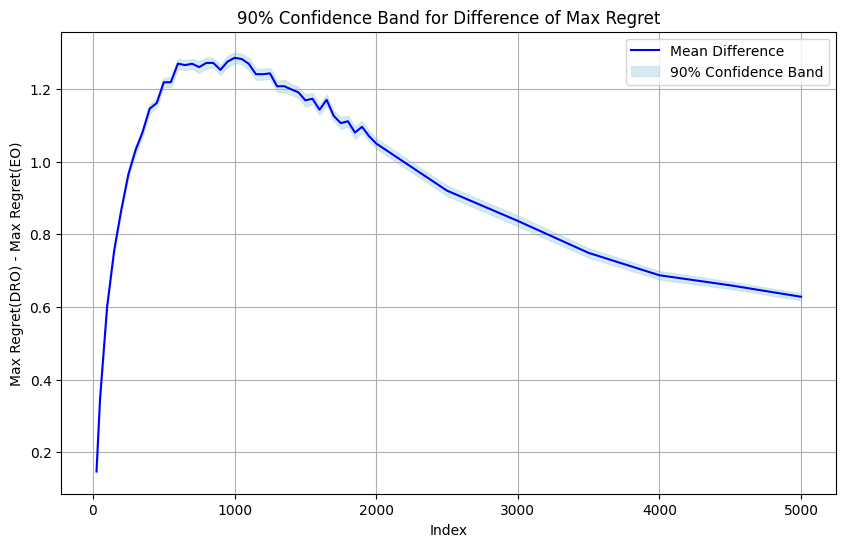

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'data' is your list of dataframes
N = len(data)

# Step 1: Calculate the difference DRO - EO for each dataframe
differences = [df['DRO'] - df['EO'] for df in data]

# Convert the list of differences into a single DataFrame where each column is a dataframe's difference
differences_df = pd.DataFrame(differences).T

# Step 2: Compute mean and standard deviation for each index
mean_diff = differences_df.mean(axis=1)
std_diff = differences_df.std(axis=1)

# Step 3: Calculate the 90% confidence interval (z = 1.645 for 90% confidence)
z = 1.645
ci_upper = mean_diff + z * (std_diff / np.sqrt(N))
ci_lower = mean_diff - z * (std_diff / np.sqrt(N))

# Step 4: Plot the mean difference with the confidence band
plt.figure(figsize=(10, 6))
indices = differences_df.index
plt.plot(indices, mean_diff, label='Mean Difference', color='blue')
plt.fill_between(indices, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='90% Confidence Band')

plt.title('90% Confidence Band for Difference of Max Regret')
plt.xlabel('Index')
plt.ylabel('Max Regret(DRO) - Max Regret(EO)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


ns

array([  25,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450, 2500])

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import random

# Fix the true distribution (Finite, Discrete)

def get_true_dist(N):
  # Fix seed before running this
  # Mean vector
  mu = np.array([0.074, 0.309, 0.548])

  # Covariance matrix
  Sigma = np.array([[0.858, -0.139, -0.242],
                    [-0.139, 0.698, -0.136],
                    [-0.242, -0.136, 0.408]])


  samples = np.random.multivariate_normal(mu, Sigma, 50)
  e_0 = samples  # true distribution
  p_0 = np.ones(len(samples))/len(samples) # true distribution

  return (e_0,p_0)

# Generate Distribution within phi divergence

def get_ds(S,eta):
  d = np.random.normal(size = S)
  d = d-np.mean(d)
  scale = sum(d**2)/(eta**2/S)
  d = d/np.sqrt(scale)
  return d

def get_Qs(values,M,eta):
  '''
  values: True distribution is uniform over these points
  M: Number of Q's to generate
  eta: phi divergence radius

  Returns a list of Q's. Each Q is a list of probabilities, on the same set of points as values
  '''
  S = len(values)
  P = [1/S]*S
  Qs = [P + get_ds(S,eta) for i in range(M)]
  return Qs


## Get optimal solution

#given $Q$, obtain $x^*(Q)$

#  - $Q$ is characterized by $(e,p)$
#  - $e$ is the set of points in the support of $Q$ (same as base $e_0$)
#  - $p$ is the corresponding probabilities



# Define the objective function
def objective(theta, p, e):
    # Compute the objective function efficiently using vectorized operations
    exp_terms = np.exp(-np.dot(e, theta))  # e_i^T * theta for all i
    return np.dot(p, exp_terms)  # Weighted sum by p

# Constraint: sum(theta) = 1
def constraint_sum(theta):
    return np.sum(theta) - 1

# Bounds for theta (theta_i >= 0)
def create_bounds(n):
    return [(0, None) for _ in range(n)]

# Fast implementation using vectorized operations
def optima(p, e):
    n = e.shape[1]  # Dimension of theta
    theta_initial = np.ones(n) / n  # Initial guess: uniform distribution

    # Define the constraints and bounds
    constraints = {'type': 'eq', 'fun': constraint_sum}
    bounds = create_bounds(n)

    # Perform the optimization using SLSQP
    result = minimize(objective, theta_initial, args=(p, e), method='SLSQP', bounds=bounds, constraints=[constraints])

    return result.x, result.fun


#Get optimals


def get_optimals(Qs, e):
  '''
  Qs: list of Q's
  e: support of Q (assumed same for all the Q's)
  returns: list of optimal loss
  '''
  return np.array([optima(Q, e)[1] for Q in Qs])


### Evaluate Regret

#  - We have a vector of decisions xs (length k)
#  - We have a list of Qs (length l)
#  - $e$ is the finite support of the distributions
#  - Return matrix ($k\times l$) with regret of each $(x,Q)$ pair

def get_regrets(xs, Qs, e_0):
  k = len(xs)
  l = len(Qs)
  A = get_optimals(Qs, e_0)
  out =  [[(objective(x,Qs[i],e_0) - A[i]) for x in xs] for i in range(l)]
  return pd.DataFrame(out, columns = [f'x{i}' for i in range(k)])

#KL Dro Solution

# Conjugate function φ*(s) = -log(1 - s) for s < 1, applied element-wise
def phi_star(s):
    # Apply a heavy penalty for s >= 1
    penalty = 1e10  # Large penalty for invalid s
    return np.where(s < 1,  -np.log(1 - s),penalty)

# Define the objective function for the DRO problem
def objective_dro(vars, xi_values, lambda_, n):
    x = vars[:-2]  # Decision variable x
    alpha = vars[-2]  # Dual variable α
    beta = vars[-1]   # Dual variable β

    if alpha <= 0:
        return np.inf  # α must be non-negative

    # Compute h(x, ξi) = exp(-x^T ξi) for all ξi
    h_xi = np.exp(-xi_values.dot(x))  # shape: (n,)

    # Compute s = (h(x, ξi) - β) / α for all ξi
    s = (h_xi - beta) / alpha
    if max(s) >= 1:
        return np.inf  # s must be < 1

    # Apply the conjugate function φ*(s) for all s
    sum_term = np.sum(phi_star(s))

    # Full objective function
    return alpha * (sum_term / n) + alpha * lambda_ + beta



# New constraint: sum of x must equal 1
def constraint_sum_to_one(vars):
    x = vars[:-2]  # Decision variable x
    return np.sum(x) - 1

# DRO solver function with positivity and sum-to-one constraints
def dro_solution(xi_values, lambda_):
    n, d = xi_values.shape  # n = number of data points, d = dimension of each data point ξi

    # Initial guess for x, α, and β
    x_init = EO_solution(xi_values)  # Random initial guess for x, ensuring positivity
    x_init = x_init / np.sum(x_init)  # Normalize to sum to 1
    alpha_init = 1.0  # Initial guess for α

    h_xi = np.exp(-xi_values.dot(x_init))  # shape: (n,)

    # Compute s = (h(x, ξi) - β) / α for all ξi


    beta_init = max(h_xi)   # Initial guess for β

    initial_guess = np.hstack([x_init, alpha_init, beta_init])

    # Define the bounds (x_i ≥ 0 and α ≥ 0)
    bounds = [(0, None)] * d + [(0, None), (None, None)]

    # Define the constraints for α ≥ 0 and sum of x = 1
    constraints = [
        {'type': 'eq', 'fun': constraint_sum_to_one} # sum(x) = 1
    ]

    # Solve the optimization problem using 'SLSQP'
    result = minimize(objective_dro, initial_guess, args=(xi_values, lambda_, n),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    x_opt = result.x[:-2]
    alpha_opt = result.x[-2]
    beta_opt = result.x[-1]
    return x_opt, alpha_opt, beta_opt

# EO solution

def EO_solution(xi_values):
  e_new = xi_values
  p_new = np.ones(len(e_new))/len(e_new)
  EO, _ = optima(p_new, e_new)
  return EO


# Consider a bunch of datasets



def evaluate_solutions(N, n, lambda_, e_0):
    # Initialize empty lists to store the outputs for dro_solution and EO_solution
    dro_outputs = []
    EO_outputs = []

    for _ in range(N):
        # Sample xi_values from e_0 with replacement
        indices = np.random.choice(len(e_0), n, replace=True)
        xi_values = e_0[indices]

        # Evaluate dro_solution and EO_solution
        dro_output = dro_solution(xi_values, lambda_)
        EO_output = EO_solution(xi_values)

        # Append the outputs to their respective lists
        dro_outputs.append(dro_output)
        EO_outputs.append(EO_output)

    # Convert the lists of outputs into dataframes
    #dro_df = pd.DataFrame(dro_outputs, columns=[f'dro_{i}' for i in range(len(dro_outputs[0]))])
    #EO_df = pd.DataFrame(EO_outputs, columns=[f'EO_{i}' for i in range(len(EO_outputs[0]))])

    return dro_outputs, EO_outputs


'''
# Single Run

### Parameters:
  - $\gamma_{\lambda}$, $\kappa_{\lambda}$:   Control relative growths of $(n, \lambda_n)$.
  - $\gamma_{\eta}$, $\kappa_{\eta}$:   Control relative growths of $(n, \eta_n)$.
  - N:  Number of data sets to estimate Expectation
  - M:  Number of Qs to take maximum over

### Scheme:
We have $(n, \eta_n, \lambda_n)$.
Consider $n\in [100, 500, 1000, 1500, 2000]$.
output: a single vector, representing max expected regret at each n.


For each n:

  - Create M Qs within $\eta_n$ divergence of $e_0$
  - Create N datasets. For each data, evaluate $x^{EO}$, $x^{DRO}_{\lambda_n}$.
  - Create the two $M\times N$ matrix of regrets
  - Take Expectation over N, then Max over M

'''

def Single_Run(ns, G_l, K_l, G_e, K_e, N, M, e_0):
  lambdas = (G_l/(ns**K_l))**2
  etas = G_e/(ns**K_e)
  Ss = 1/np.sqrt(ns)+etas
  l = len(ns)
  outs = []
  for i in range(l):
    n = ns[i]
    print(n, flush = True)
    lambda_ = lambdas[i]
    eta = etas[i]
    s = Ss[i]

    print('n ,lambda_, eta, s = ',np.round([n,lambda_, eta, s],6))

    Qs = get_Qs(e_0,M,eta)

    DRO_sols, EO_sols = evaluate_solutions(N, n, lambda_, e_0)

    DRO_Mat = get_regrets(DRO_sols, Qs, e_0)/(s**2)
    EO_Mat = get_regrets(EO_sols, Qs, e_0)/(s**2)

    DRO_Expectations = DRO_Mat.mean(axis = 1)
    EO_Expectations = EO_Mat.mean(axis = 1)

    # print(DRO_Expectations.shape) # should be M
    # print(EO_Expectations.shape)

    max_DRO = DRO_Expectations.max()
    max_EO = EO_Expectations.max()

    outs.append([max_DRO, max_EO])
  return pd.DataFrame(outs, columns = ['DRO', 'EO'], index = ns)




In [ ]:
G_l, K_l = 0.5, 1
G_e, K_e = 0.5, 1
ns = 500 * (np.array(range(10)) + 5)
N = 10
M = 10
e_0 = get_true_dist(20)[0]

In [ ]:
Single_Run(ns, G_l, K_l, G_e, K_e, N, M, e_0)

2500
n ,lambda_, eta, s =  [2.50e+03 0.00e+00 2.00e-04 2.02e-02]
3000
n ,lambda_, eta, s =  [3.0000e+03 0.0000e+00 1.6700e-04 1.8424e-02]
3500
n ,lambda_, eta, s =  [3.5000e+03 0.0000e+00 1.4300e-04 1.7046e-02]
4000
n ,lambda_, eta, s =  [4.0000e+03 0.0000e+00 1.2500e-04 1.5936e-02]
4500
n ,lambda_, eta, s =  [4.5000e+03 0.0000e+00 1.1100e-04 1.5018e-02]
5000
n ,lambda_, eta, s =  [5.0000e+03 0.0000e+00 1.0000e-04 1.4242e-02]
5500
n ,lambda_, eta, s =  [5.5000e+03 0.0000e+00 9.1000e-05 1.3575e-02]
6000
n ,lambda_, eta, s =  [6.0000e+03 0.0000e+00 8.3000e-05 1.2993e-02]
6500
n ,lambda_, eta, s =  [6.500e+03 0.000e+00 7.700e-05 1.248e-02]
7000
n ,lambda_, eta, s =  [7.0000e+03 0.0000e+00 7.1000e-05 1.2024e-02]


,DRO,EO
2500,0.733293,0.724919
3000,0.915389,0.899818
3500,0.838853,0.818004
4000,0.949555,0.957719
4500,0.477667,0.468188
5000,0.825554,0.823484
5500,0.872304,0.871480
6000,0.708766,0.722055
6500,0.610225,0.610126
7000,0.782191,0.776949


In [ ]:
1/(ns**0.5)

array([0.02      , 0.01825742, 0.01690309, 0.01581139, 0.01490712,
       0.01414214, 0.013484  , 0.01290994, 0.01240347, 0.01195229])

In [ ]:
Q

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [ ]:
def testing(lambda_):
  A = get_optimals([Q], e_0)
  x = dro_solution(e_0, lambda_)[0]
  M = (objective(x,Q,e_0)-A)
  return M

In [ ]:
A = [testing(1/(i*100))[0] for i in range(1,200)]

<Axes: xlabel='1', ylabel='0'>

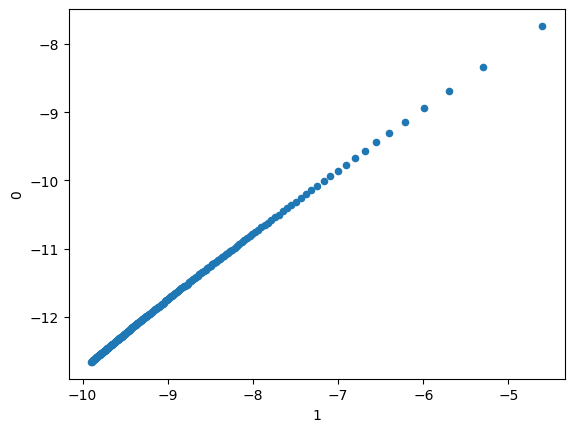

In [ ]:
A = pd.Series(A)
B = [1/(i*100) for i in range(1,200)]
B = pd.Series(B)
DF = pd.DataFrame([A,B]).T
np.log(DF).plot.scatter(x = 1, y = 0)

<Axes: >

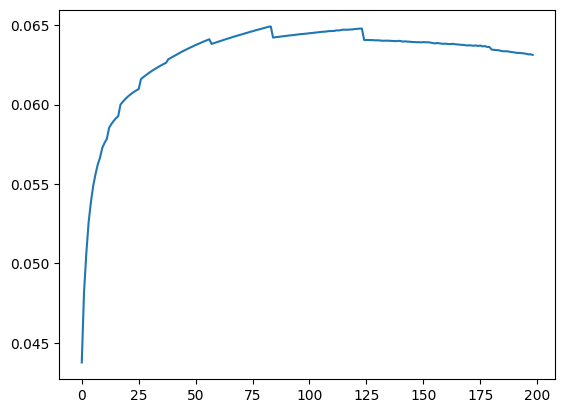

In [ ]:
B = [1/(i*100) for i in range(1,200)]
B = pd.Series(B)
(A/B).plot()

# $L_2$ Regularization

In [73]:
def L2obj(x,samples,lambda_):
  exp_ = np.exp(-e_0.dot(x))
  return exp_.mean() + lambda_*x.dot(x)

def constraint_sum(x):
    return np.sum(x) - 1

def L_2_optimize(samples, lambda_):
  n = samples.shape[1]
  x_init = np.ones(n)/n
  const = {'type': 'eq', 'fun': constraint_sum}
  bounds = [(0, None) for _ in range(n)]
  result = minimize(L2obj, x_init, args=(samples, lambda_), method='SLSQP', bounds=bounds, constraints=[const])
  return result.x

def true_obj(x, samples):
  exp_ = np.exp(-e_0.dot(x))
  return exp_.mean()


def true_optima(samples):
  n = samples.shape[1]
  x_init = np.ones(n)/n
  const = {'type': 'eq', 'fun': constraint_sum}
  bounds = [(0, None) for _ in range(n)]
  result = minimize(true_obj, x_init, args=(samples), method='SLSQP', bounds=bounds, constraints=[const])
  return result.x

In [87]:
import Regret_Analysis_Finite as ra

In [103]:
e_0

array([[-1.36513935,  0.68387468,  1.64220693],
       [-2.33965754, -0.64400261,  1.56821202],
       [-0.78284417,  0.68040432,  0.7408774 ],
       [-0.02753375,  0.57304361,  1.31733578],
       [-0.53693182,  0.51347014,  1.00904913],
       [-0.43346726, -0.7726283 ,  1.14671956],
       [-0.60928522,  0.60295977, -0.71639673],
       [-0.75501627, -0.29367439,  0.78490802],
       [-1.7933765 ,  2.08276812,  0.70359975],
       [ 0.35672313, -0.65787297,  1.67674853],
       [-0.28076948, -0.09144187,  0.38398028],
       [ 1.92336458,  0.03133546, -0.13478743],
       [-1.24191188, -0.32327703,  1.23689332],
       [ 0.18639336,  0.77340563, -0.52435518],
       [ 1.28890447, -1.76325194,  0.57128178],
       [ 0.7598027 ,  1.27679934,  0.24146595],
       [ 1.37342671, -0.15116343, -0.39369967],
       [-0.44654966,  0.60325481, -0.00686841],
       [ 0.0642331 , -0.01474801,  0.7320123 ],
       [-0.19734391,  0.81713928,  0.24931023],
       [ 0.56002456,  0.24690345, -0.126

In [102]:
xs = [L_2_optimize(e_0, l) for l in Ls]
Q = [1/len(e_0)]*len(e_0)
Qs = [Q]
MM = ra.get_regrets(xs, Qs, e_0).values
MM

array([[5.18680243e-05, 1.39860891e-05, 6.56622625e-06, 3.87554409e-06,
        2.59296231e-06, 1.87752676e-06, 1.43532287e-06, 1.14147040e-06,
        9.35340093e-07, 7.84635627e-07, 6.70730040e-07, 5.82293673e-07,
        5.12046650e-07, 4.55211671e-07, 4.08468901e-07, 3.69467976e-07,
        3.36552082e-07, 3.08462219e-07, 2.84262310e-07, 2.63244615e-07,
        2.44833241e-07, 2.28592086e-07, 2.14213742e-07, 2.01385530e-07,
        1.89875068e-07, 1.79498527e-07, 1.70115617e-07, 1.61593674e-07,
        1.53814174e-07, 1.46700591e-07, 1.40176084e-07, 1.34155449e-07,
        1.28593647e-07, 1.23459190e-07, 1.18683796e-07, 1.14247557e-07,
        1.10100857e-07, 1.06227073e-07, 1.02604234e-07, 9.92074566e-08,
        9.60215180e-08, 9.30136655e-08, 9.01821611e-08, 8.75127476e-08,
        8.49767082e-08, 8.25910063e-08, 8.03177828e-08, 7.81692331e-08,
        7.61219734e-08, 7.41697510e-08, 7.23191458e-08, 7.05600941e-08,
        6.88639400e-08, 6.72486337e-08, 6.57097178e-08, 6.423582

In [93]:
Ls = 1/(np.array(range(1,100))*200)
A = [L_2_optimize(e_0, l) - true_optima(e_0) for l in Ls]
B = [np.sqrt(a.dot(a)) for a in A]


In [78]:
AA = [true_obj(L_2_optimize(e_0, l), e_0) - true_obj(true_optima(e_0), e_0) for l in Ls]


<Axes: xlabel='L', ylabel='Loss'>

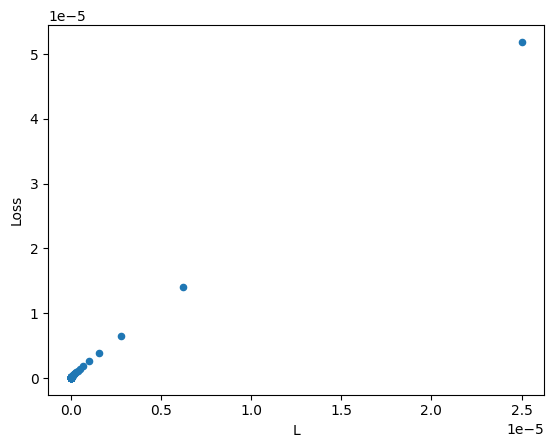

In [80]:
DF = pd.DataFrame({'L': Ls**2, 'Loss': AA})
DF.plot.scatter(x = 'L', y = 'Loss')

<Axes: >

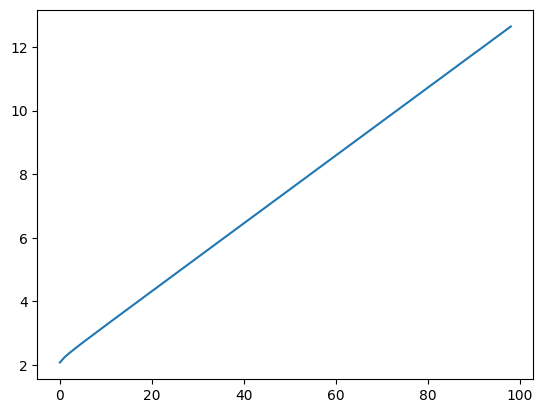

In [82]:
(DF['Loss']/(DF['L'])).plot()

array([2.80432058e-17, 5.67395940e-02, 9.43260406e-01])

In [ ]:
e_0.mean(axis = 1)

array([ 0.32031409, -0.47181604,  0.21281252,  0.62094855,  0.32852915,
       -0.019792  , -0.2409074 , -0.08792755,  0.33099712,  0.4585329 ,
        0.00392298,  0.60663754, -0.10943187,  0.14514793,  0.03231144,
        0.75935599,  0.27618787,  0.04994558,  0.26049913,  0.28970187,
        0.22669012,  0.35131181,  0.16462999,  0.21952647,  0.50093295,
        0.37176978,  0.03174537, -0.25274953,  0.15581296,  0.77520389,
        0.20532753,  0.33639325,  0.05085364, -0.38504442, -0.02276949,
       -0.01064971,  0.35761761,  0.85268218,  0.45096609,  0.46385139,
        0.52871565,  0.25155476,  0.2261208 ,  0.53408522,  0.20883098,
        0.09451967,  0.06378316,  0.40288875, -0.318978  ,  0.29339587])